# Лабораторная работа №2 (Визуализация данных)
## Семыкина Вера, 6132-010402D

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data = pd.read_csv('Game_of_Thrones/character-deaths.csv', sep=',') 

In [18]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,907,908,909,910,911,912,913,914,915,916
Name,Addam Marbrand,Aegon Frey (Jinglebell),Aegon Targaryen,Adrack Humble,Aemon Costayne,Aemon Estermont,Aemon Targaryen (son of Maekar I),Aenys Frey,Aeron Greyjoy,Aethan,...,Yohn Royce,Yoren,Young Henly,Ysilla,Zei,Zollo,Yurkhaz zo Yunzak,Yezzan Zo Qaggaz,Torwynd the Tame,Talbert Serry
Allegiances,Lannister,None,House Targaryen,House Greyjoy,Lannister,Baratheon,Night's Watch,None,House Greyjoy,Night's Watch,...,Arryn,Night's Watch,Night's Watch,House Targaryen,Stark,None,None,None,Wildling,Tyrell
Death Year,NaN,299.0,NaN,300.0,NaN,NaN,300.0,300.0,NaN,NaN,...,NaN,299.0,299.0,NaN,NaN,NaN,300.0,300.0,300.0,300.0
Book of Death,NaN,3.0,NaN,5.0,NaN,NaN,4.0,5.0,NaN,NaN,...,NaN,2.0,3.0,NaN,NaN,NaN,5.0,5.0,5.0,4.0
Death Chapter,NaN,51.0,NaN,20.0,NaN,NaN,35.0,NaN,NaN,NaN,...,NaN,19.0,55.0,NaN,NaN,NaN,59.0,57.0,73.0,29.0
Book Intro Chapter,56.0,49.0,5.0,20.0,NaN,NaN,21.0,59.0,11.0,0.0,...,29.0,13.0,55.0,8.0,64.0,21.0,47.0,25.0,73.0,29.0
Gender,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,0,1,1,1,1,1
Nobility,1,1,1,1,1,1,1,1,1,0,...,1,0,0,0,0,0,0,1,0,1
GoT,1,0,0,0,0,0,1,1,0,0,...,1,1,0,0,0,0,0,0,0,0
CoK,1,0,0,0,0,1,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0


## 1 Matplotlib

 1.1 Построить любой график (любого рода) с помощью чистого matplotlib / pylab

(array([49.,  0., 73.,  0.,  0., 97.,  0., 27.,  0., 61.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

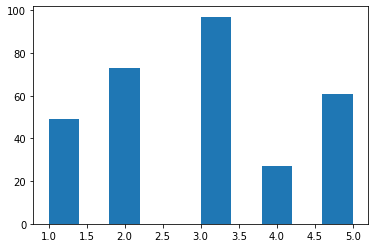

In [20]:
plt.hist(data['Book of Death'])

#### 1.2 Построить несколько суб-графиков на одном графике используя .subplot.

Text(0, 0.5, 'Book of Death')

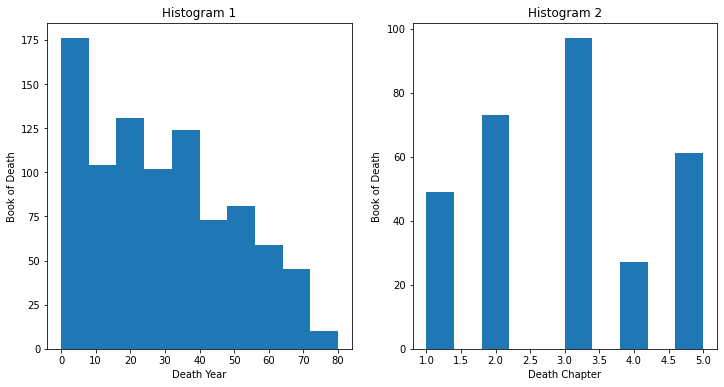

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.hist(data['Book Intro Chapter'])
ax1.set_title('Histogram 1')
ax1.set_xlabel('Death Year')
ax1.set_ylabel('Book of Death')
ax2.hist(data['Book of Death'])
ax2.set_title('Histogram 2')
ax2.set_xlabel('Death Chapter')
ax2.set_ylabel('Book of Death')

 2 На основе Вашего датасета построить три разных вида графиков используя pandas.DataFrame.plot / Series.plot (мануал) Среди графиков должен присутствовать один boxplot (обязательно надо использовать параметр by, для исследования взаимосвязи числовой переменной и какой-либо другой). Графики должны быть построены как через методы DataFrame, так и через методы Series. То есть оба варианта нужно продемонстрировать.


<AxesSubplot:ylabel='Density'>

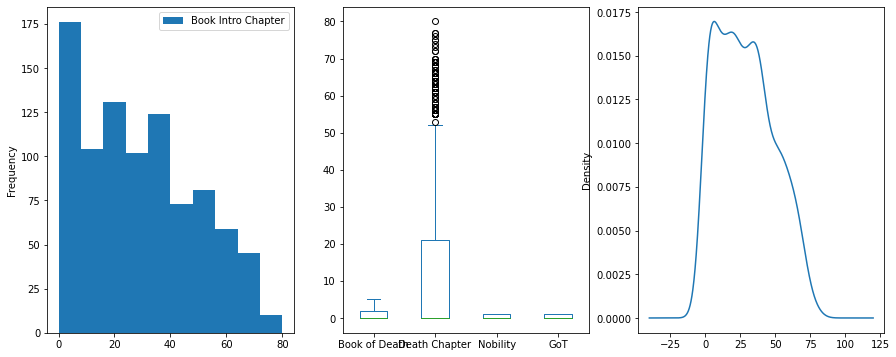

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))

data.plot(y='Book Intro Chapter', kind='hist', ax=ax1)
data.fillna(0).plot(y=[3, 4, 7, 8], kind='box', ax=ax2)
data['Book Intro Chapter'].plot.kde(y='Class', ax=ax3)

### 3 Seaborn

 3.1 Построить .pairplot с помощью seaborn на каком-либо наборе данных, проанализировав взаимосвязь набора числовых переменных

Между разными признаками не наблюдается сильной корреляции 

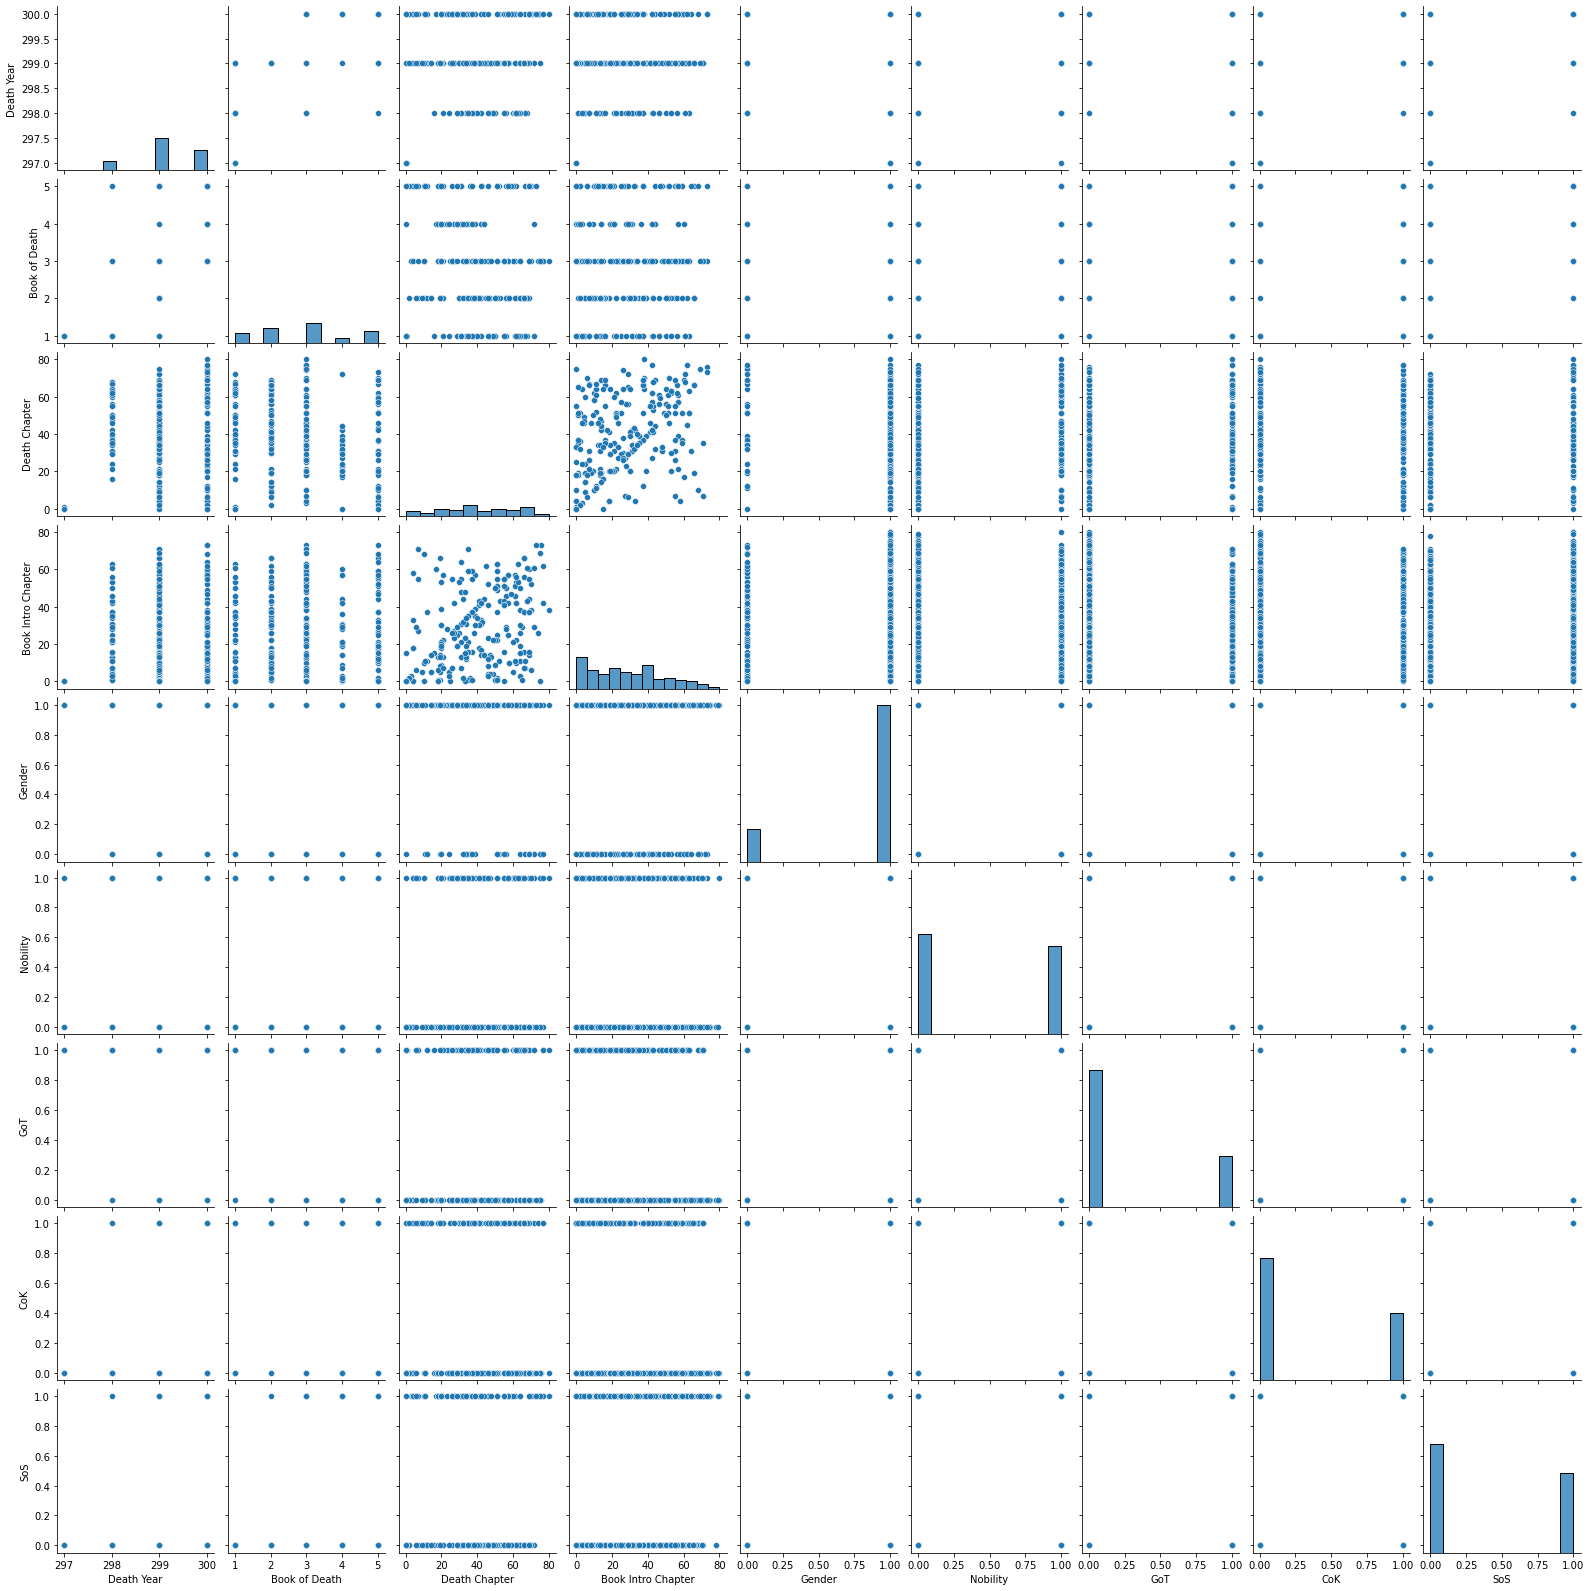

In [25]:
sns.pairplot(data.iloc[::, 2:-2])

#### 3.2 Построить .jointplot, проанализировав взаимосвязь двух конкретных числовых переменных

Большинство персонажей существовали небольшое число глав

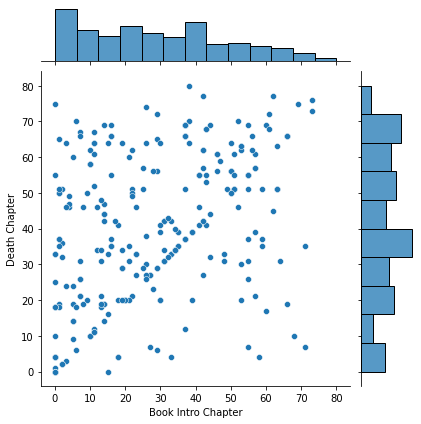

In [27]:
sns.jointplot(x='Book Intro Chapter', y='Death Chapter', data=data)

#### 3.3 Построить .boxplot или .violinplot на каком-либо наборе данных, проанализировав какой-то числовой показатель в разрезе категориального

Во всех книгах персонажи стабильно умирают

<AxesSubplot:xlabel='Book of Death', ylabel='Death Chapter'>

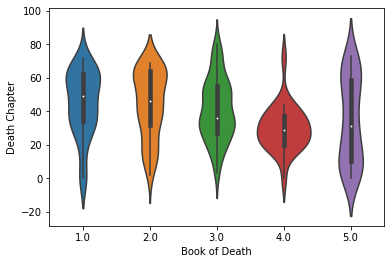

In [29]:
sns.violinplot(x='Book of Death', y='Death Chapter', data=data)

#### 3.4 Построить график heatmap попарной корреляции всех числовых признаков (категориальные признаки убираете из графика)

Сильной корреляции не наблюдаю

<AxesSubplot:>

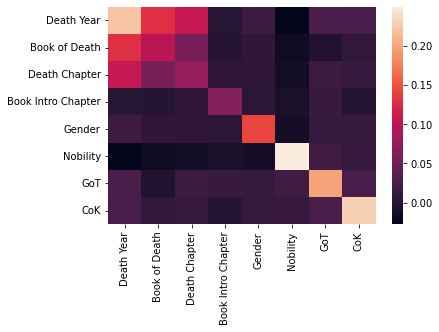

In [30]:
sns.heatmap(data.fillna(0).iloc[::, 2:-3].apply(lambda x: ((x - x.min())/(x.max() - x.min())), axis=0).cov())

 4 Построить QQ-график (и гистограмму) для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению

In [31]:
from scipy.stats import probplot

В определенном диапазоне значений очень близко к нормальному распределению

((array([-3.17252410e+00, -2.90537659e+00, -2.75616929e+00, -2.65087187e+00,
         -2.56868276e+00, -2.50087345e+00, -2.44292162e+00, -2.39217053e+00,
         -2.34692202e+00, -2.30602254e+00, -2.26865145e+00, -2.23420348e+00,
         -2.20221897e+00, -2.17234033e+00, -2.14428373e+00, -2.11781998e+00,
         -2.09276123e+00, -2.06895157e+00, -2.04626008e+00, -2.02457575e+00,
         -2.00380360e+00, -1.98386169e+00, -1.96467886e+00, -1.94619288e+00,
         -1.92834899e+00, -1.91109877e+00, -1.89439917e+00, -1.87821174e+00,
         -1.86250201e+00, -1.84723893e+00, -1.83239444e+00, -1.81794308e+00,
         -1.80386170e+00, -1.79012917e+00, -1.77672616e+00, -1.76363493e+00,
         -1.75083915e+00, -1.73832379e+00, -1.72607492e+00, -1.71407969e+00,
         -1.70232613e+00, -1.69080314e+00, -1.67950039e+00, -1.66840820e+00,
         -1.65751758e+00, -1.64682007e+00, -1.63630776e+00, -1.62597323e+00,
         -1.61580950e+00, -1.60580999e+00, -1.59596852e+00, -1.58627924e+00,

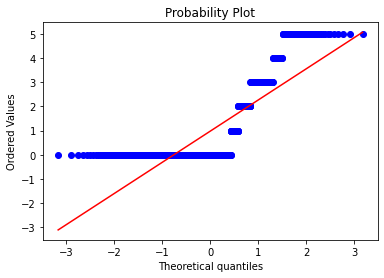

In [33]:
data.dropna()
probplot(data['Book of Death'].fillna(0), dist="norm", plot=plt)

### 5 Построить любой график (связанный с вашими данными) с помощью plotly

Интересно что с данной библиотекой получается строить интерактивные графики без мороки с ipywidgets и прочим.. Не знал.

!pip install plotly

In [ ]:
pip install plotly


In [ ]:
import plotly.express as px

In [ ]:
px.histogram(data, x='Book of Death')

In [ ]:
px.line(np.arange(0, 100))

In [73]:
px.histogram(data, x='Book of Death', y='danceability', marginal="box")

In [74]:
px.imshow([[1, 20, 30],
           [20, 1, 60],
           [30, 60, 1]])